# Ajuste de Modelos Lineares Generalizados Binomial com diferentes funções de ligação para dados reais de insetos três tipos de inseticidas.

In [1]:
require(ggplot2)
require(MASS)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: MASS



In [2]:
#Inseticida DDT
dose=c(2,2.64,3.48,4.59,6.06,8)
p=c(3/50,5/49,19/47,19/50,24/49,35/50)
m=c(50,49,47,50,49,50)
y=p*m

In [3]:
resp=cbind(y,m-y)
colnames(resp)=c("Sucessos","Fracassos")
resp

Sucessos,Fracassos
3,47
5,44
19,28
19,31
24,25
35,15


In [4]:
dados=cbind.data.frame(dose,p,m,y)
dados

dose,p,m,y
<dbl>,<dbl>,<dbl>,<dbl>
2.00,0.0600000,50,3
2.64,0.1020408,49,5
3.48,0.4042553,47,19
4.59,0.3800000,50,19
6.06,0.4897959,49,24
8.00,0.7000000,50,35


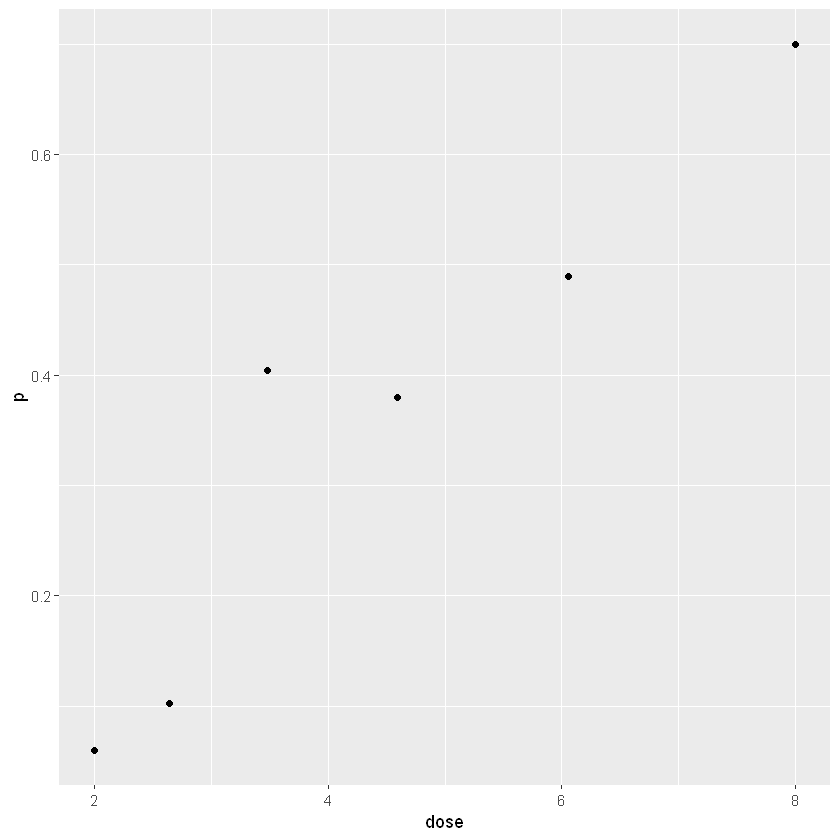

In [5]:
ggplot(dados)+aes(dose,p)+geom_point()

In [6]:
modelo=glm(resp~dose,family = binomial(link="probit"))

In [7]:
summary(modelo)


Call:
glm(formula = resp ~ dose, family = binomial(link = "probit"))

Deviance Residuals: 
      1        2        3        4        5        6  
-1.4999  -1.2867   2.5613   0.4860  -0.3677  -0.4705  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.74699    0.20442  -8.546  < 2e-16 ***
dose         0.29493    0.03982   7.406  1.3e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 70.300  on 5  degrees of freedom
Residual deviance: 11.058  on 4  degrees of freedom
AIC: 38.507

Number of Fisher Scoring iterations: 4


In [8]:
model.matrix(modelo)

,(Intercept),dose
1,1,2.00
2,1,2.64
3,1,3.48
4,1,4.59
5,1,6.06
6,1,8.00


In [9]:
modelo$coefficients

(Intercept)        dose 
 -1.7469866   0.2949253

In [10]:
modelo$fitted.values

1         2         3         4         5         6 
0.1236084 0.1664264 0.2355635 0.3470566 0.5160574 0.7298687

In [11]:
modelo$linear.predictors

1           2           3           4           5           6 
-1.15713597 -0.96838375 -0.72064647 -0.39327935  0.04026089  0.61241605

In [12]:
modelo$residuals

1           2           3           4           5           6 
-0.31142732 -0.25793599  0.54822048  0.08921635 -0.06588123 -0.09031265

In [13]:
dose.p(modelo,cf=1:2,p=0.5)
dose.p(modelo,cf=1:2,p=0.9)

             Dose        SE
p = 0.5: 5.923488 0.3171371

             Dose        SE
p = 0.9: 10.26883 0.7971605

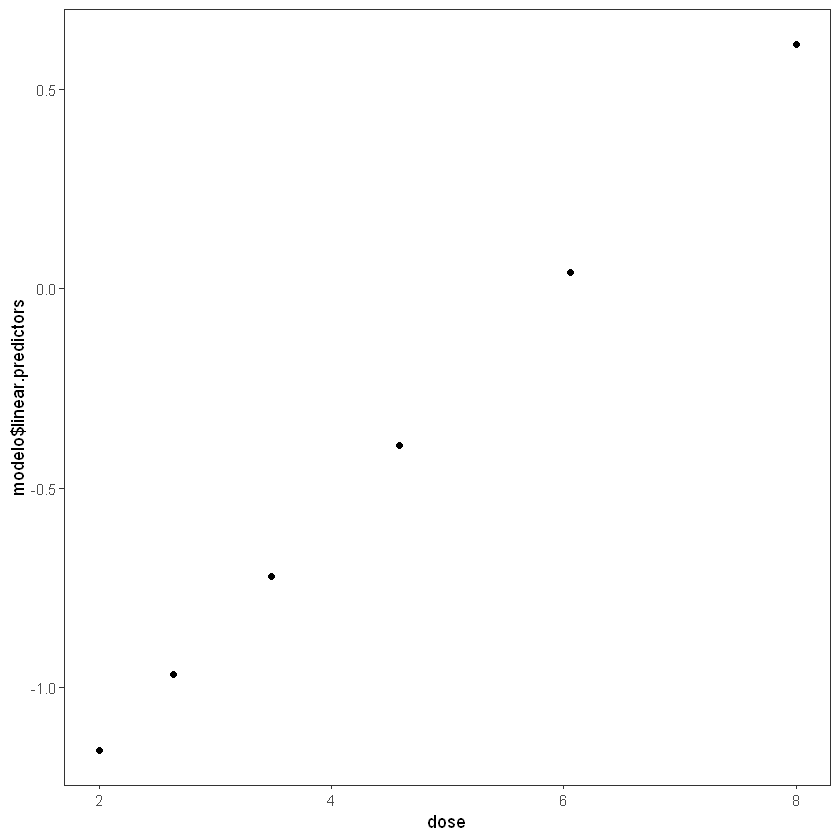

In [14]:
ggplot(dados)+aes(dose,modelo$linear.predictors)+geom_point()+theme_test()

In [15]:
modelo1=glm(resp~dose,family = binomial(link="logit"))

In [16]:
summary(modelo1)


Call:
glm(formula = resp ~ dose, family = binomial(link = "logit"))

Deviance Residuals: 
      1        2        3        4        5        6  
-1.6501  -1.3611   2.5615   0.5256  -0.3628  -0.4746  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.84984    0.35887  -7.941 2.00e-15 ***
dose         0.48064    0.06859   7.007 2.43e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 70.30  on 5  degrees of freedom
Residual deviance: 11.77  on 4  degrees of freedom
AIC: 39.219

Number of Fisher Scoring iterations: 4


In [17]:
model.matrix(modelo1)

,(Intercept),dose
1,1,2.00
2,1,2.64
3,1,3.48
4,1,4.59
5,1,6.06
6,1,8.00


In [18]:
modelo1$coefficients

(Intercept)        dose 
 -2.8498402   0.4806387

In [19]:
modelo1$fitted.values

1         2         3         4         5         6 
0.1314084 0.1706604 0.2355529 0.3444087 0.5157025 0.7301275

In [20]:
modelo1$linear.predictors

1           2           3           4           5           6 
-1.88856273 -1.58095395 -1.17721742 -0.64370843  0.06283049  0.99526962

In [21]:
modelo1$residuals

1          2          3          4          5          6 
-0.6256200 -0.4848228  0.9368833  0.1576290 -0.1037285 -0.1528995

In [22]:
dose.p(modelo1,cf=1:2,p=0.5)
dose.p(modelo1,cf=1:2,p=0.9)

             Dose        SE
p = 0.5: 5.929277 0.3215552

             Dose        SE
p = 0.9: 10.50075 0.8549464

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'modelo2' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(

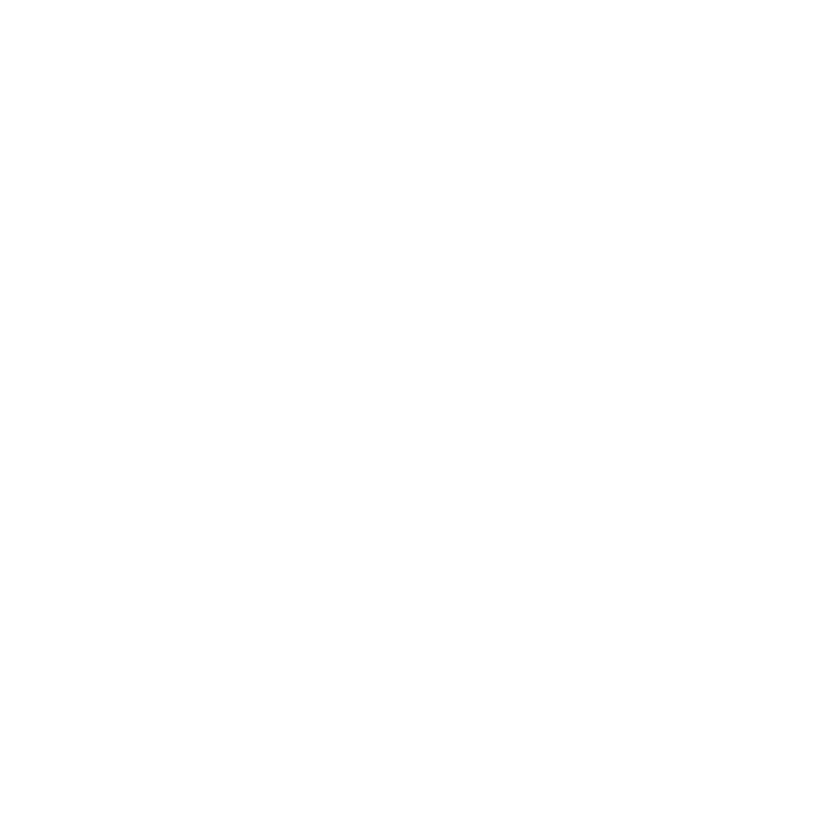

In [23]:
ggplot(dados)+aes(dose,modelo2$linear.predictors)+geom_point()+theme_test()

In [24]:
modelo2=glm(resp~dose,family = binomial(link="cloglog"))

In [25]:
summary(modelo2)


Call:
glm(formula = resp ~ dose, family = binomial(link = "cloglog"))

Deviance Residuals: 
       1         2         3         4         5         6  
-1.94983  -1.54807   2.55011   0.76125   0.02197  -0.55561  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.53961    0.28655  -8.863  < 2e-16 ***
dose         0.35296    0.04839   7.294 3.01e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 70.30  on 5  degrees of freedom
Residual deviance: 13.59  on 4  degrees of freedom
AIC: 41.039

Number of Fisher Scoring iterations: 5


In [26]:
model.matrix(modelo2)

,(Intercept),dose
1,1,2.00
2,1,2.64
3,1,3.48
4,1,4.59
5,1,6.06
6,1,8.00


In [27]:
modelo2$coefficients

(Intercept)        dose 
 -2.5396079   0.3529607

In [28]:
modelo2$fitted.values

1         2         3         4         5         6 
0.1477056 0.1815390 0.2362145 0.3288154 0.4882269 0.7351354

In [29]:
modelo2$linear.predictors

1          2          3          4          5          6 
-1.8336864 -1.6077916 -1.3113045 -0.9195181 -0.4006658  0.2840781

In [30]:
modelo2$residuals

1            2            3            4            5            6 
-0.643869319 -0.484857672  0.816461452  0.191266368  0.004576781 -0.099849942

In [31]:
dose.p(modelo2,cf=1:2,p=0.5)

             Dose        SE
p = 0.5: 6.156761 0.2978483

In [32]:
dose.p(modelo2,cf=1:2,p=0.9)

             Dose        SE
p = 0.9: 9.558118 0.6202478

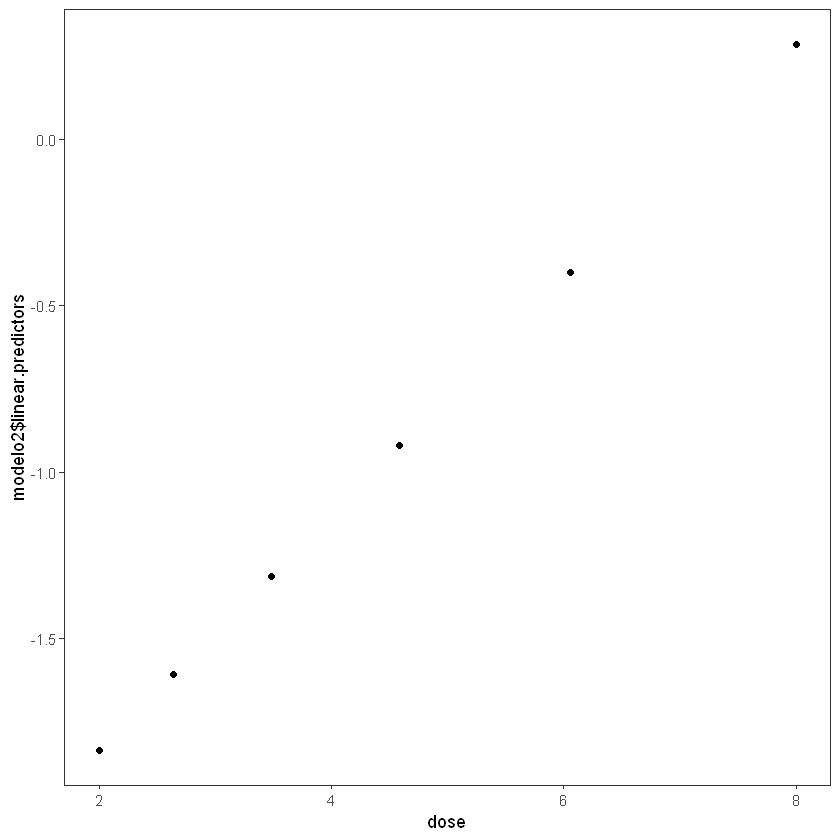

In [33]:
ggplot(dados)+aes(dose,modelo2$linear.predictors)+geom_point()+theme_test()

`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


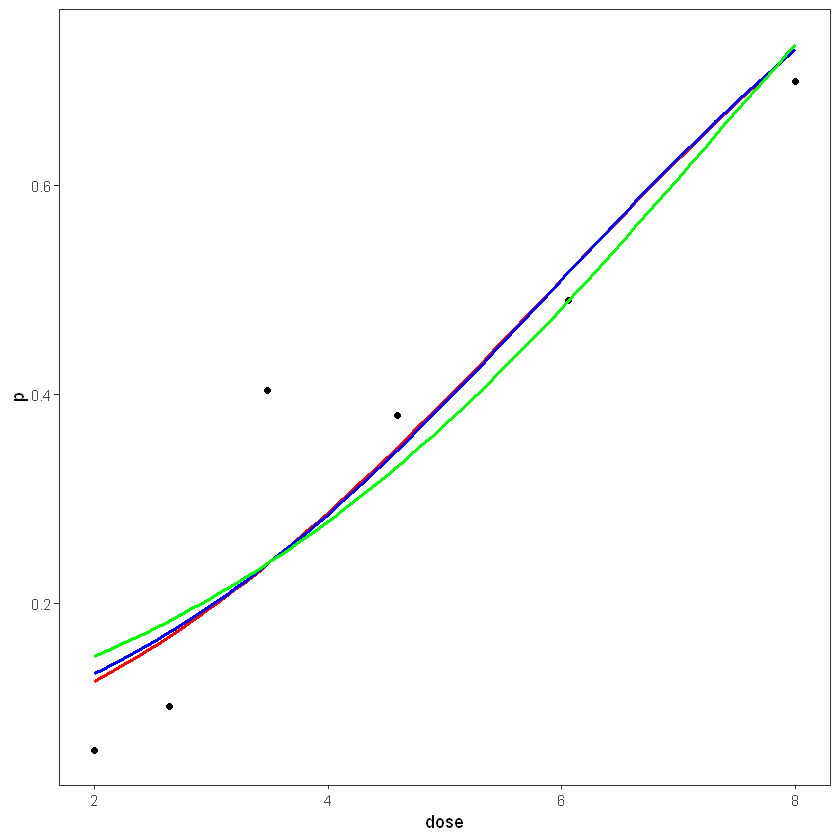

In [34]:
(ggplot(dados)+aes(dose,p)+geom_point()
+geom_smooth(color="red",method=glm, method.args = list(family = binomial(link="probit")),se=F)
+geom_smooth(color="blue",method=glm, method.args = list(family = binomial(link="logit")),se=F)
+geom_smooth(color="green",method=glm, method.args = list(family = binomial(link="cloglog")),se=F)+theme_test())

In [35]:
#Inseticidade BHC
dose1=c(2,2.64,3.48,4.59,6.06,8)
p1=c(2/50,14/49,20/50,27/50,41/50,40/50)
m1=c(50,49,50,50,50,50)
y1=p1*m1

In [36]:
resp1=cbind(y1,m1-y1)
colnames(resp1)=c("Sucessos","Fracassos")
resp1

Sucessos,Fracassos
2,48
14,35
20,30
27,23
41,9
40,10


In [37]:
dados1=cbind(dose1,p1,m1,y1)
dados1=data.frame(dados1);dados1

dose1,p1,m1,y1
<dbl>,<dbl>,<dbl>,<dbl>
2.00,0.0400000,50,2
2.64,0.2857143,49,14
3.48,0.4000000,50,20
4.59,0.5400000,50,27
6.06,0.8200000,50,41
8.00,0.8000000,50,40


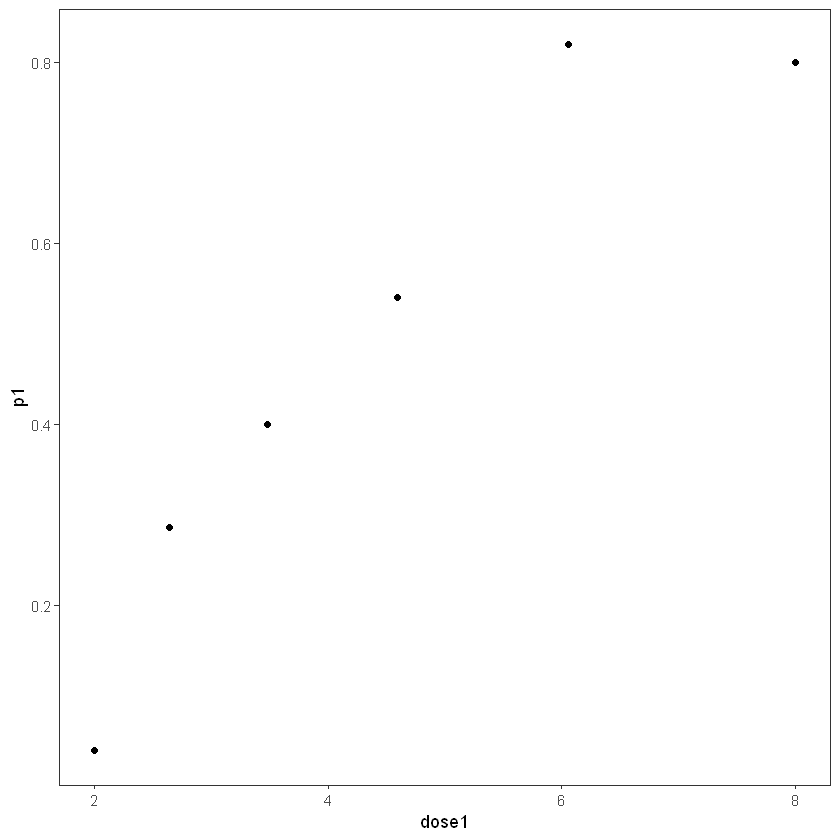

In [38]:
#Análise exploratória 
ggplot(dados1)+aes(dose1,p1)+geom_point()+theme_test()

In [39]:
modelo3=glm(resp1~dose1,family = binomial(link="probit"))

In [40]:
summary(modelo3)


Call:
glm(formula = resp1 ~ dose1, family = binomial(link = "probit"))

Deviance Residuals: 
      1        2        3        4        5        6  
-2.8901   0.7633   0.8343   0.5426   1.8445  -1.9900  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.6812     0.2021  -8.318   <2e-16 ***
dose1         0.3672     0.0429   8.560   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 105.197  on 5  degrees of freedom
Residual deviance:  17.288  on 4  degrees of freedom
AIC: 44.506

Number of Fisher Scoring iterations: 5


In [41]:
model.matrix(modelo3)

,(Intercept),dose1
1,1,2.00
2,1,2.64
3,1,3.48
4,1,4.59
5,1,6.06
6,1,8.00


In [42]:
modelo3$coefficients

(Intercept)       dose1 
  -1.681239    0.367188

In [43]:
modelo3$fitted.values

1         2         3         4         5         6 
0.1718542 0.2382748 0.3433178 0.5016570 0.7067517 0.8954900

In [44]:
modelo3$linear.predictors

1            2            3            4            5            6 
-0.946863347 -0.711863021 -0.403425092  0.004153599  0.543919973  1.256264712

In [45]:
modelo3$residuals

1           2           3           4           5           6 
-0.51744874  0.15320362  0.15412674  0.09611237  0.32912760 -0.52692621

In [46]:
dose.p(modelo3,cf=1:2,p=0.5)
dose.p(modelo3,cf=1:2,p=0.9)

             Dose        SE
p = 0.5: 4.578688 0.2195681

             Dose       SE
p = 0.9: 8.068866 0.488219

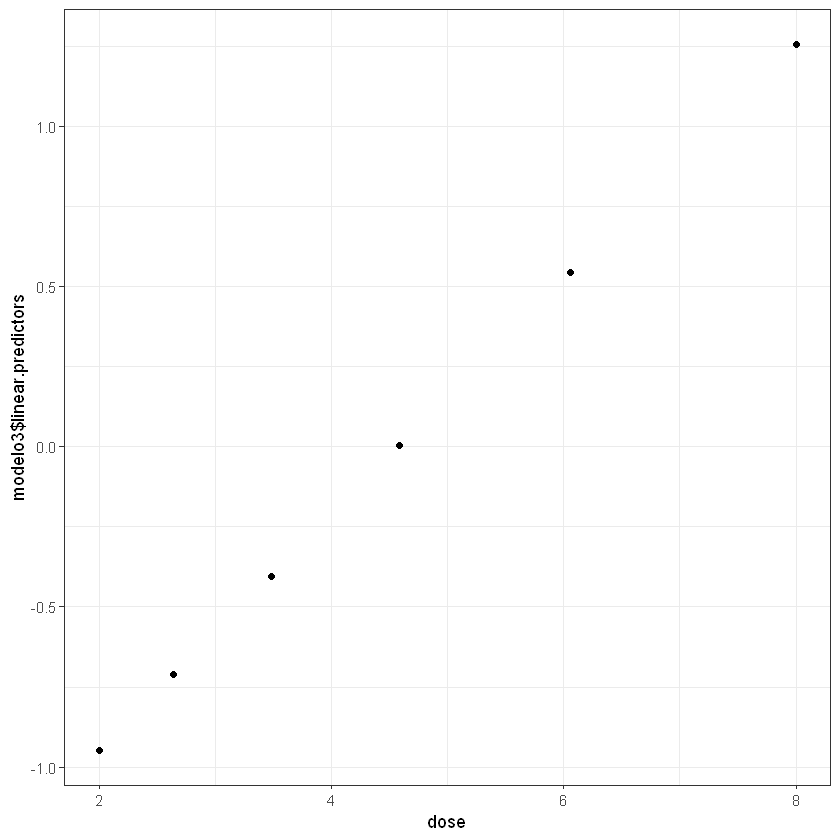

In [47]:
ggplot(dados)+aes(dose,modelo3$linear.predictors)+geom_point()+theme_bw()

In [48]:
modelo4=glm(resp1~dose1,family = binomial(link="logit"))

In [49]:
summary(modelo4)


Call:
glm(formula = resp1 ~ dose1, family = binomial(link = "logit"))

Deviance Residuals: 
      1        2        3        4        5        6  
-2.9032   0.7831   0.8261   0.4092   1.6031  -2.0320  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.81091    0.35845  -7.842 4.44e-15 ***
dose1        0.62207    0.07786   7.990 1.35e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 105.20  on 5  degrees of freedom
Residual deviance:  16.59  on 4  degrees of freedom
AIC: 43.809

Number of Fisher Scoring iterations: 4


In [50]:
model.matrix(modelo4)

,(Intercept),dose1
1,1,2.00
2,1,2.64
3,1,3.48
4,1,4.59
5,1,6.06
6,1,8.00


In [51]:
modelo4$coefficients

(Intercept)       dose1 
 -2.8109053   0.6220669

In [52]:
modelo4$fitted.values

1         2         3         4         5         6 
0.1726771 0.2370993 0.3438661 0.5110936 0.7228855 0.8971203

In [53]:
modelo4$linear.predictors

1           2           3           4           5           6 
-1.56677149 -1.16864869 -0.64611251  0.04438173  0.95882004  2.16562979

In [54]:
modelo4$residuals

1          2          3          4          5          6 
-0.9287230  0.2687643  0.2487959  0.1156825  0.4847919 -1.0522763

In [55]:
dose.p(modelo4,cf=1:2,p=0.5)
dose.p(modelo4,cf=1:2,p=0.9)

             Dose        SE
p = 0.5: 4.518654 0.2202814

            Dose        SE
p = 0.9: 8.05079 0.5218674

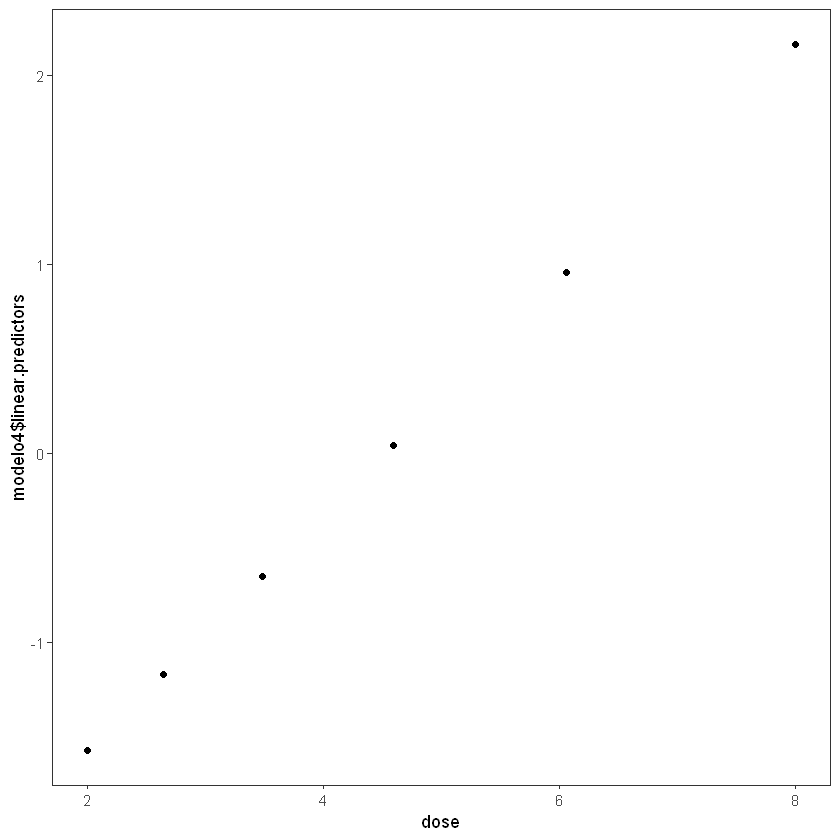

In [56]:
ggplot(dados)+aes(dose,modelo4$linear.predictors)+geom_point()+theme_test()

In [57]:
modelo5=glm(resp1~dose1,family = binomial(link="cloglog"))

In [58]:
summary(modelo5)


Call:
glm(formula = resp1 ~ dose1, family = binomial(link = "cloglog"))

Deviance Residuals: 
      1        2        3        4        5        6  
-3.6064   0.2723   0.7893   0.9632   2.4459  -1.9081  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.13077    0.24594  -8.664   <2e-16 ***
dose1        0.36649    0.04414   8.303   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 105.197  on 5  degrees of freedom
Residual deviance:  24.255  on 4  degrees of freedom
AIC: 51.473

Number of Fisher Scoring iterations: 6


In [59]:
model.matrix(modelo5)

,(Intercept),dose1
1,1,2.00
2,1,2.64
3,1,3.48
4,1,4.59
5,1,6.06
6,1,8.00


In [60]:
modelo5$coefficients

(Intercept)       dose1 
 -2.1307721   0.3664895

In [61]:
modelo5$fitted.values

1         2         3         4         5         6 
0.2189701 0.2683640 0.3463074 0.4719324 0.6652407 0.8922659

In [62]:
modelo5$linear.predictors

1           2           3           4           5           6 
-1.39779301 -1.16323971 -0.85538849 -0.44858510  0.09015452  0.80114423

In [63]:
modelo5$residuals

1           2           3           4           5           6 
-0.92718524  0.07589252  0.19321093  0.20186869  0.42244538 -0.38437517

In [64]:
dose.p(modelo5,cf=1:2,p=0.5)
dose.p(modelo5,cf=1:2,p=0.9)

             Dose        SE
p = 0.5: 4.813941 0.2491998

             Dose        SE
p = 0.9: 8.089738 0.4270381

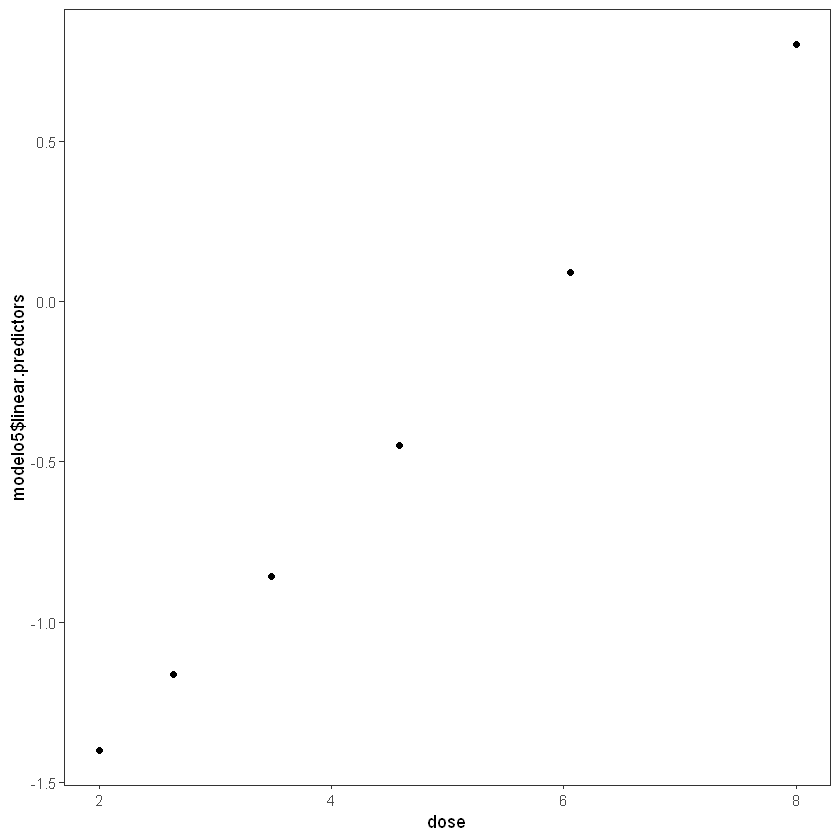

In [65]:
ggplot(dados)+aes(dose,modelo5$linear.predictors)+geom_point()+theme_test()

`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


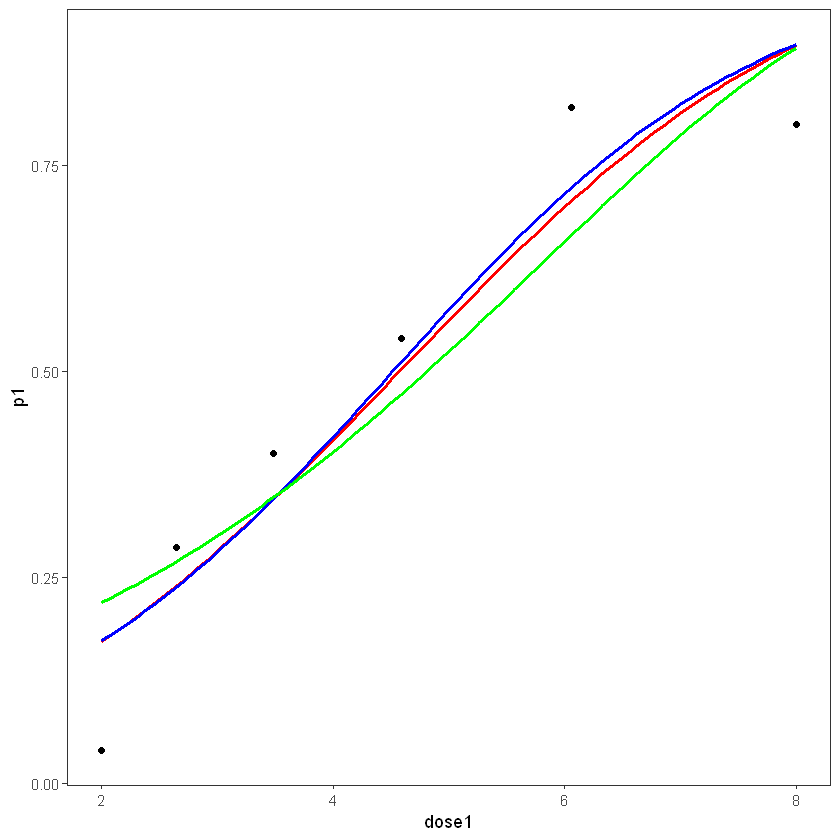

In [66]:
(ggplot(dados1)+aes(dose1,p1)+geom_point()
  +geom_smooth(color="red",method=glm, method.args = list(family = binomial(link="probit")),se=F)
  +geom_smooth(color="blue",method=glm, method.args = list(family = binomial(link="logit")),se=F)
  +geom_smooth(color="green",method=glm, method.args = list(family = binomial(link="cloglog")),se=F)+theme_test())

In [67]:
#Insecicidade DDT + BHC
dose2=c(2,2.64,3.48,4.59,6.06,8)
p2=c(28/50,37/50,46/50,48/50,48/50,50/50)
m2=c(50,50,50,50,50,50)
y2=p2*m2

In [68]:
resp2=cbind(y2,m2-y2)
colnames(resp2)=c("Sucessos","Fracassos")
resp2

Sucessos,Fracassos
28,22
37,13
46,4
48,2
48,2
50,0


In [69]:
dados2=cbind(dose2,p2,m2,y2)
dados2=data.frame(dados2);dados2

dose2,p2,m2,y2
<dbl>,<dbl>,<dbl>,<dbl>
2.00,0.56,50,28
2.64,0.74,50,37
3.48,0.92,50,46
4.59,0.96,50,48
6.06,0.96,50,48
8.00,1.00,50,50


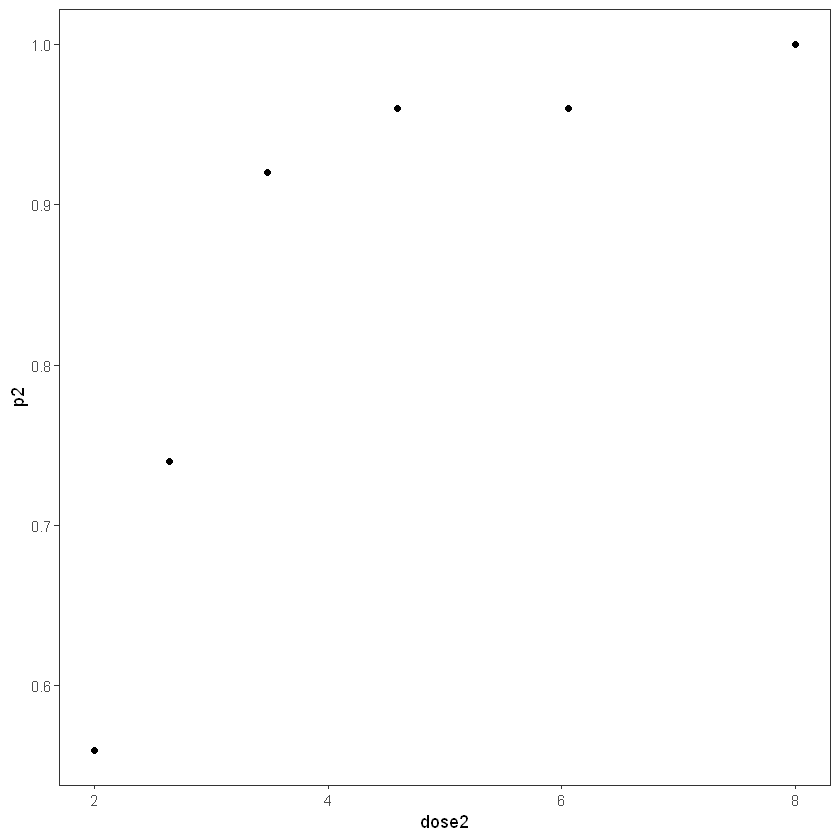

In [70]:
#Análise exploratória 
ggplot(dados2)+aes(dose2,p2)+geom_point()+theme_test()

In [71]:
modelo6=glm(resp2~dose2,family = binomial(link="probit"))

In [72]:
summary(modelo6)


Call:
glm(formula = resp2 ~ dose2, family = binomial(link = "probit"))

Deviance Residuals: 
       1         2         3         4         5         6  
-0.92273   0.09216   1.51580   0.57825  -1.50097   0.25161  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.65382    0.29886  -2.188   0.0287 *  
dose2        0.48468    0.09265   5.232 1.68e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 59.2167  on 5  degrees of freedom
Residual deviance:  5.8082  on 4  degrees of freedom
AIC: 26.612

Number of Fisher Scoring iterations: 6


In [73]:
model.matrix(modelo6)

,(Intercept),dose2
1,1,2.00
2,1,2.64
3,1,3.48
4,1,4.59
5,1,6.06
6,1,8.00


In [74]:
modelo6$coefficients

(Intercept)       dose2 
 -0.6538201   0.4846804

In [75]:
modelo6$fitted.values

1         2         3         4         5         6 
0.6238244 0.7342560 0.8491671 0.9418928 0.9887949 0.9993671

In [76]:
modelo6$linear.predictors

1         2         3         4         5         6 
0.3155408 0.6257362 1.0328678 1.5708630 2.2833432 3.2236232

In [77]:
modelo6$residuals

1           2           3           4           5           6 
-0.16815023  0.01751161  0.30267811  0.15587515 -0.97844611  0.28639376

In [78]:
dose.p(modelo6,cf=1:2,p=0.5)
dose.p(modelo6,cf=1:2,p=0.9)

             Dose        SE
p = 0.5: 1.348971 0.3844185

             Dose        SE
p = 0.9: 3.993088 0.2791612

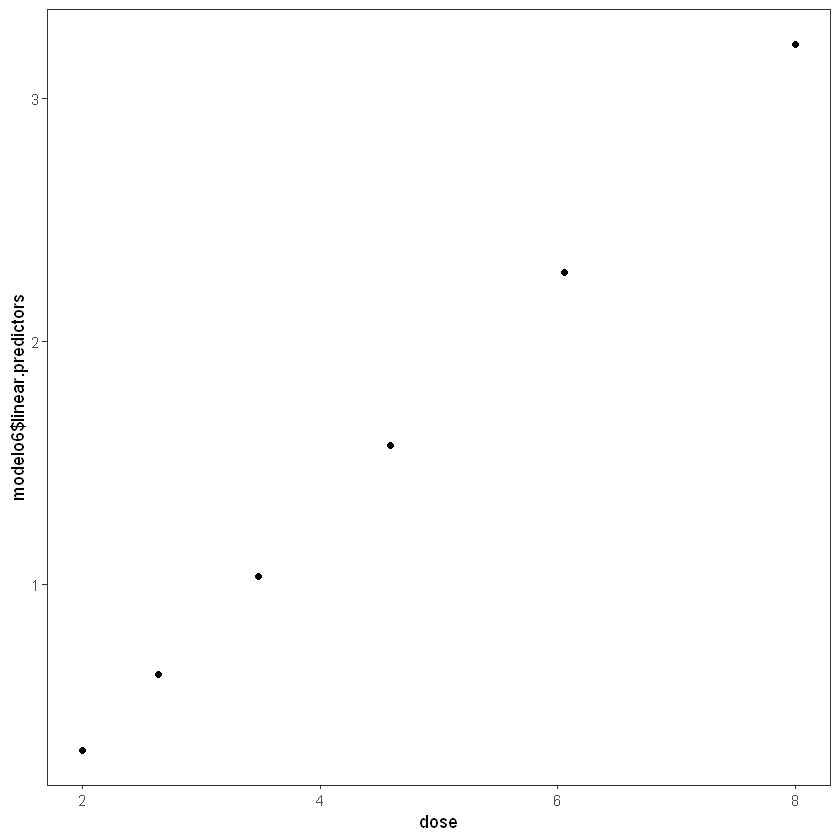

In [79]:
ggplot(dados)+aes(dose,modelo6$linear.predictors)+geom_point()+theme_test()

In [80]:
modelo7=glm(resp2~dose2,family = binomial(link="logit"))

In [81]:
summary(modelo7)


Call:
glm(formula = resp2 ~ dose2, family = binomial(link = "logit"))

Deviance Residuals: 
       1         2         3         4         5         6  
-0.55263   0.03662   1.19587   0.29936  -1.45005   0.41730  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.5852     0.5681  -2.790  0.00527 ** 
dose2         0.9922     0.1939   5.116 3.12e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 59.2167  on 5  degrees of freedom
Residual deviance:  4.1032  on 4  degrees of freedom
AIC: 24.907

Number of Fisher Scoring iterations: 5


In [82]:
model.matrix(modelo7)


,(Intercept),dose2
1,1,2.00
2,1,2.64
3,1,3.48
4,1,4.59
5,1,6.06
6,1,8.00


In [83]:
modelo7$coefficients

(Intercept)       dose2 
 -1.5851548   0.9921693

In [84]:
modelo7$fitted.values

1         2         3         4         5         6 
0.5984915 0.7377240 0.8661797 0.9511493 0.9881954 0.9982601

In [85]:
modelo7$linear.predictors

1         2         3         4         5         6 
0.3991838 1.0341722 1.8675944 2.9689023 4.4273911 6.3521996

In [86]:
modelo7$residuals

1           2           3           4           5           6 
-0.16018160  0.01176328  0.46431875  0.19048388 -2.41704171  1.00174291

In [87]:
dose.p(modelo7,cf=1:2,p=0.5)
dose.p(modelo7,cf=1:2,p=0.9)

             Dose        SE
p = 0.5: 1.597666 0.2940139

             Dose        SE
p = 0.9: 3.812232 0.2725578

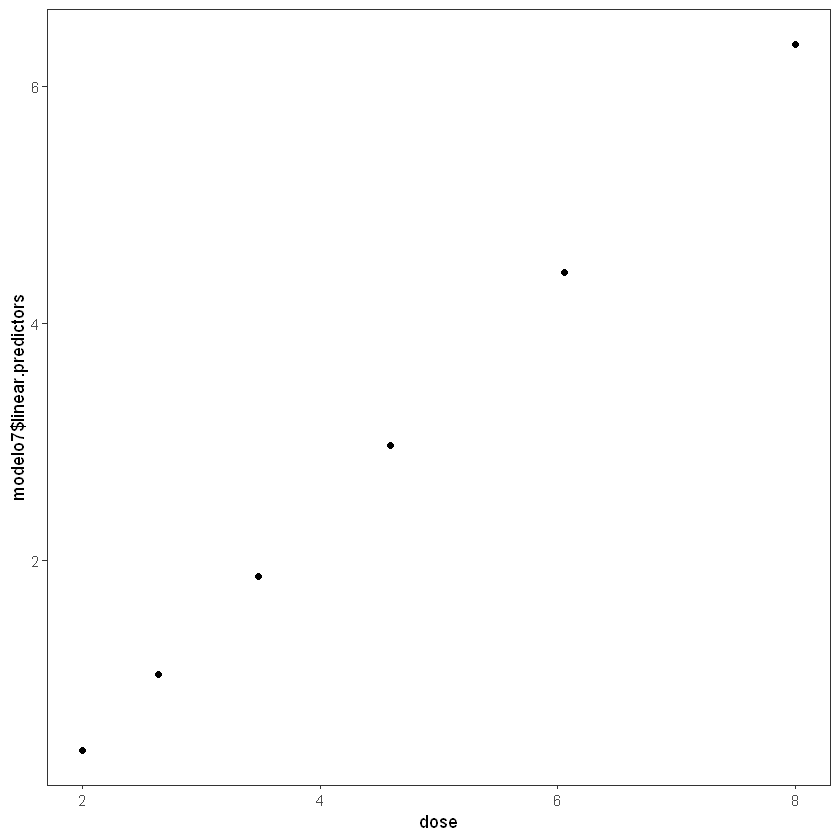

In [88]:
ggplot(dados)+aes(dose,modelo7$linear.predictors)+geom_point()+theme_test()

In [89]:
modelo8=glm(resp2~dose2,family = binomial(link="cloglog"))

In [90]:
summary(modelo8)


Call:
glm(formula = resp2 ~ dose2, family = binomial(link = "cloglog"))

Deviance Residuals: 
      1        2        3        4        5        6  
-1.3918   0.0561   1.7961   0.9196  -1.4519   0.1236  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.64059    0.25106  -2.552   0.0107 *  
dose2        0.35174    0.06893   5.103 3.34e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 59.2167  on 5  degrees of freedom
Residual deviance:  8.1353  on 4  degrees of freedom
AIC: 28.939

Number of Fisher Scoring iterations: 6


In [91]:
model.matrix(modelo8)

,(Intercept),dose2
1,1,2.00
2,1,2.64
3,1,3.48
4,1,4.59
5,1,6.06
6,1,8.00


In [92]:
modelo8$coefficients

(Intercept)       dose2 
 -0.6405939   0.3517352

In [93]:
modelo8$fitted.values

1         2         3         4         5         6 
0.6552361 0.7365101 0.8334070 0.9292197 0.9882181 0.9998473

In [94]:
modelo8$linear.predictors

1          2          3          4          5          6 
0.06287655 0.28798710 0.58344471 0.97387082 1.49092163 2.17328800

In [95]:
modelo8$residuals

1            2            3            4            5            6 
-0.259401646  0.009930756  0.290027568  0.164215191 -0.539275757  0.113802818

In [96]:
dose.p(modelo8,cf=1:2,p=0.5)
dose.p(modelo8,cf=1:2,p=0.9)

              Dose        SE
p = 0.5: 0.7792253 0.5729199

             Dose        SE
p = 0.9: 4.192433 0.2896439

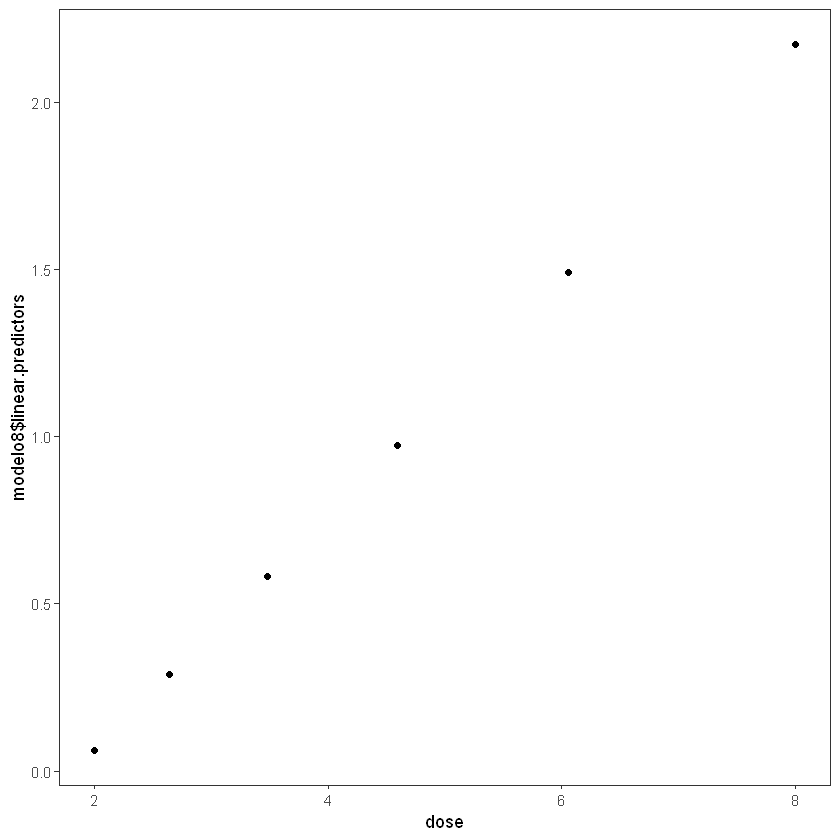

In [97]:
ggplot(dados)+aes(dose,modelo8$linear.predictors)+geom_point()+theme_test()

`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


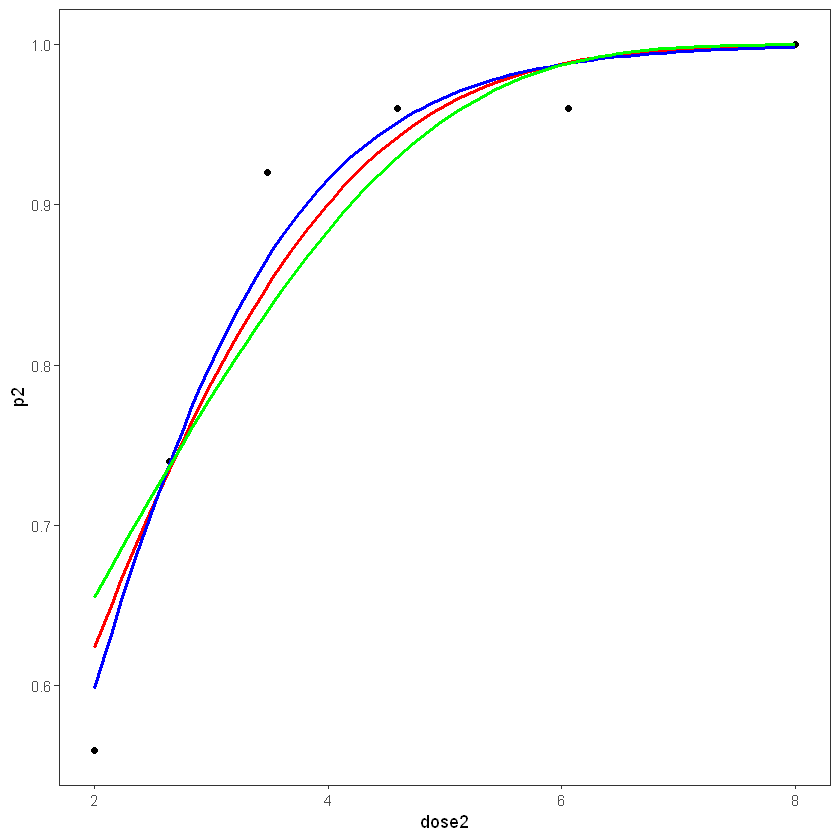

In [98]:
(ggplot(dados2)+aes(dose2,p2)+geom_point()
  +geom_smooth(color="red",method=glm, method.args = list(family = binomial(link="probit")),se=F)
  +geom_smooth(color="blue",method=glm, method.args = list(family = binomial(link="logit")),se=F)
  +geom_smooth(color="green",method=glm, method.args = list(family = binomial(link="cloglog")),se=F)+theme_test())
